## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Modelling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import  r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

## Reading The data

In [2]:
df = pd.read_csv('C:\\Users\\user\\Documents\\datasets\\stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Preparing X and Y Variables

In [3]:
X = df.drop(columns = 'math_score', axis = 1)

In [4]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [5]:
y = df['math_score']

In [6]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [7]:
print("Categories in 'gender' variable: ", end = " ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ", end = " ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable: ", end = " ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ", end = " ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ", end = " ")
print(df['lunch'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['standard' 'free/reduced']


In [8]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
    ("OneHotEncoder", oh_transformer, cat_features),
    ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X.shape

(1000, 19)

In [11]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

## Create an Evaluate function to give all metrics after model Training

In [12]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [13]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for training set')
    print("- Root mean square error: {:.4f}".format(model_train_rmse))
    print("- Mean absolute error: {:.4f}".format(model_train_mae))
    print("- R2 score: {:.4f}".format(model_train_r2))

    print("--------------------------------------------------------------------")

    print('Model performance for test set')
    print("- Root mean square error: {:.4f}".format(model_test_rmse))
    print("- Mean absolute error: {:.4f}".format(model_test_mae))
    print("- R2 score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("="*35)
    print('\n')

LinearRegression
Model performance for training set
- Root mean square error: 5.3261
- Mean absolute error: 4.2711
- R2 score: 0.8742
--------------------------------------------------------------------
Model performance for test set
- Root mean square error: 5.3893
- Mean absolute error: 4.2061
- R2 score: 0.8806


Lasso
Model performance for training set
- Root mean square error: 6.5938
- Mean absolute error: 5.2063
- R2 score: 0.8071
--------------------------------------------------------------------
Model performance for test set
- Root mean square error: 6.5197
- Mean absolute error: 5.1579
- R2 score: 0.8253


Ridge
Model performance for training set
- Root mean square error: 5.3233
- Mean absolute error: 4.2650
- R2 score: 0.8743
--------------------------------------------------------------------
Model performance for test set
- Root mean square error: 5.3904
- Mean absolute error: 4.2111
- R2 score: 0.8806


K-Neighbors Regressor
Model performance for training set
- Root mean

## Results

In [14]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=['Model Name', 'R2_score']).sort_values(by=["R2_score"], ascending=False)

,Model Name,R2_score
0,LinearRegression,0.880642
2,Ridge,0.880593
8,AdaBoost Regressor,0.852677
5,Random Forest Regressor,0.851791
7,CatBoosting Regressor,0.851632
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,K-Neighbors Regressor,0.784518
4,Decision Tree,0.746526


## Linear Model

In [15]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("accuracy of the model is %.2f"%score)

accuracy of the model is 88.06


## Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

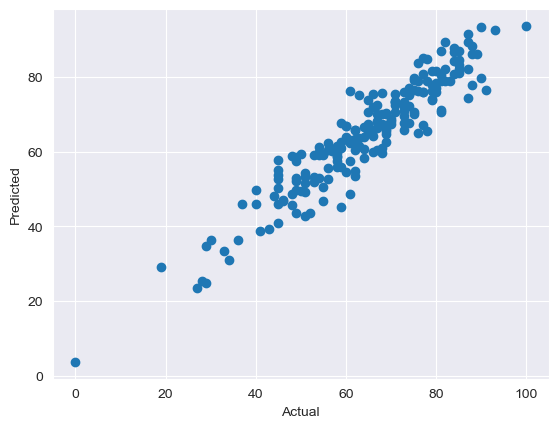

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

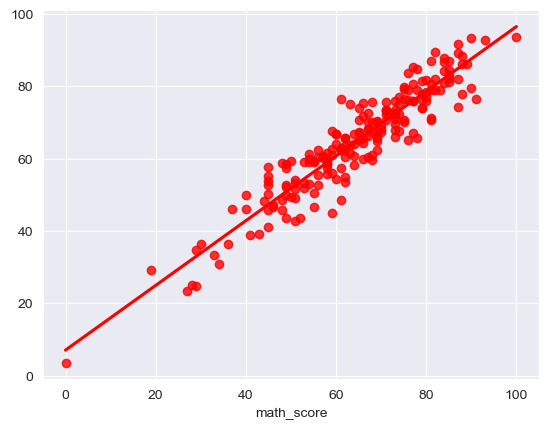

In [17]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='Red')

## Difference between actual and predicted Values

In [18]:
pred_df = pd.DataFrame({"Actual Values": y_test, "Predicted_Values": y_pred, "Difference": y_test - y_pred})
pred_df

,Actual Values,Predicted_Values,Difference
521,91,76.453125,14.546875
737,53,59.000000,-6.000000
740,80,76.968750,3.031250
660,74,76.968750,-2.968750
411,84,87.812500,-3.812500
...,...,...,...
408,52,43.546875,8.453125
332,62,62.250000,-0.250000
208,74,67.750000,6.250000
613,65,67.046875,-2.046875
